# 1. Linear regression with one variable

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#加载数据
data1 = pd.read_csv('ex1data1.txt',names = ['Population','Profit'])
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 1.1 Plotting the Data

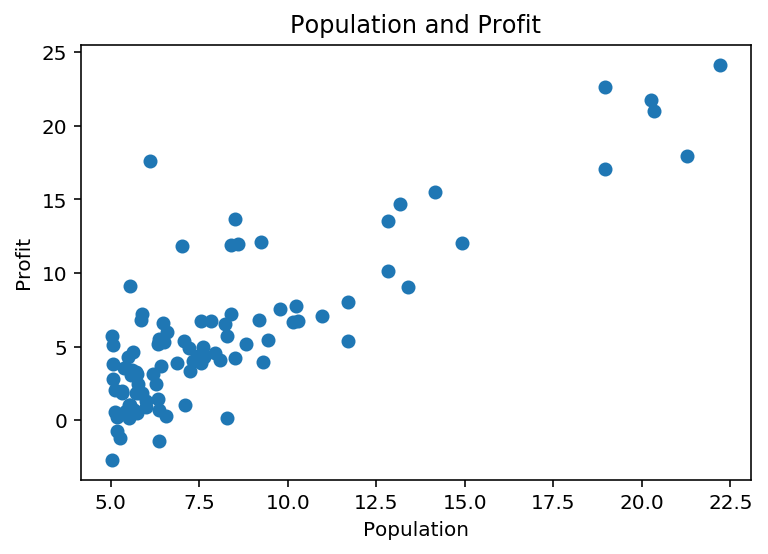

In [3]:
#绘制散点图
x = data1['Population'].values
y = data1['Profit'].values
plt.title('Population and Profit')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.scatter(x,y)

## 1.2 Gradient Descent

In [4]:
#数据准备
y_test = np.array([y]).T
x_test = np.insert(np.array([x]).T,0,values=1,axis=1)
w = np.zeros((2,1))

In [5]:
#代价函数J(θ)
def computer_cost(x_test,y_test,theta):
    m = x_test.shape[0] #样本数量
    cost = 0.5*np.sum(np.square((x_test @ theta)-y_test))/m
    return cost

In [6]:
#梯度下降算法
def gradient_descent(x_test,y_test,theta,alpha=0.01,iters=1500):
    m = x_test.shape[0] 
    j_history = []
    for i in range(1,iters):
        theta = theta - alpha * x_test.T.dot(x_test.dot(theta) - y_test)/m
        cost = computer_cost(x_test,y_test,theta)
        j_history.append(cost)
    return theta,j_history

In [7]:
#开始预测x=3.5和x=7
theta = np.zeros((2,1))
theta,j = gradient_descent(x_test,y_test,theta)
predict1 =  [1, 3.5]@theta;
predict2 =  [1, 7]@theta ;
predict1*10000,predict2*10000

(array([4522.87645807]), array([45343.87296638]))

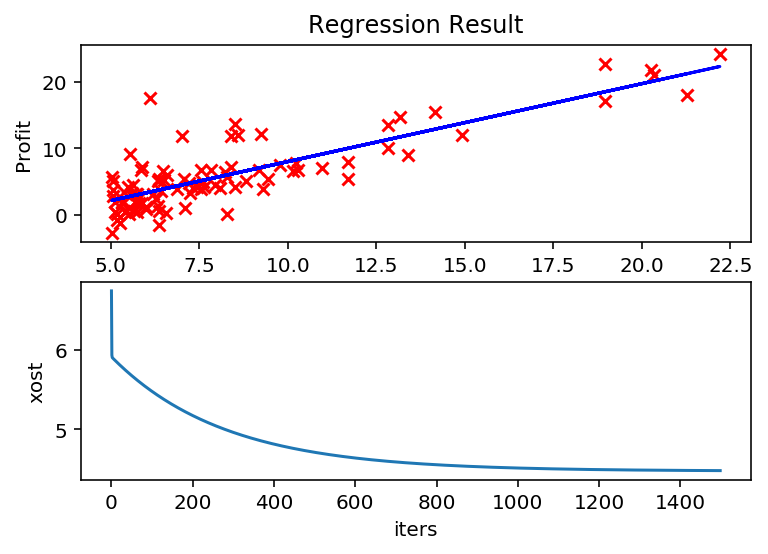

In [8]:
#画出拟合函数
plt.subplot(211)
plt.scatter(x,y,color = 'r',marker='x')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Regression Result')
plt.plot(x,np.dot(x_test,theta),color = 'blue')
#代价函数走势
plt.subplot(212)
plt.xlabel('iters')
plt.ylabel('xost')
plt.plot(j)

## 1.3 Visualizing J(θ)

<a list of 12 text.Text objects>

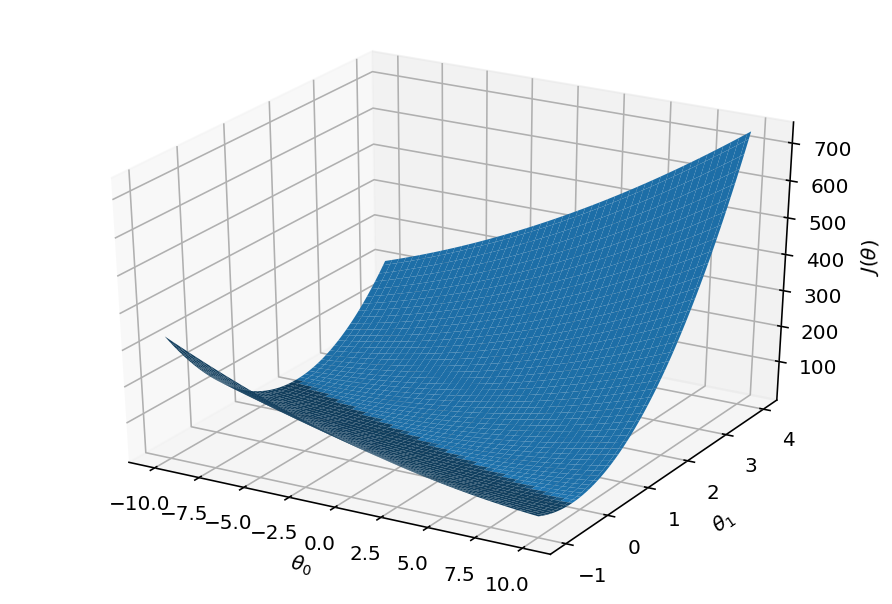

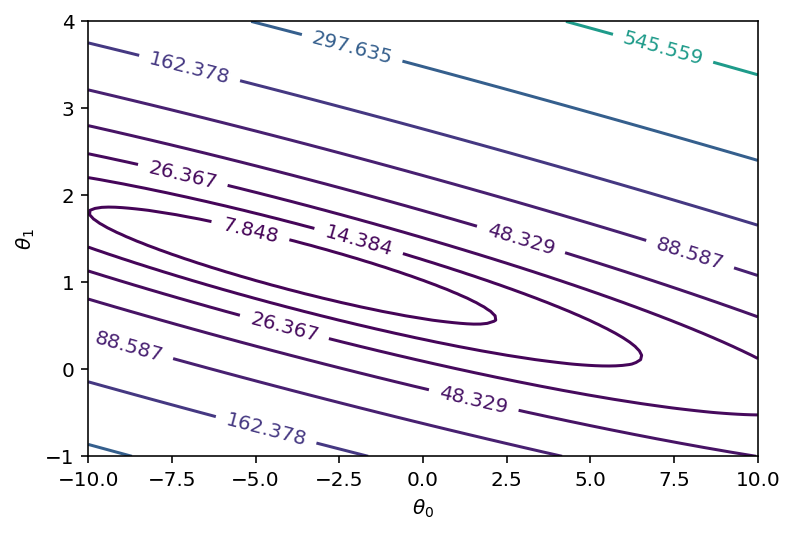

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#准备数据
thetas0 = np.linspace(-10,10,100)
thetas1 = np.linspace(-1,4,100)
Jcosts = np.zeros((100,100))

for i in range(0,100):
    for j in range(0,100):
        Jcosts[i,j] = computer_cost(x_test,y_test,np.array([[thetas0[i]],[thetas1[j]]]))
#生成网格数据
thetas0, thetas1 = np.meshgrid(thetas0, thetas1)
#矩阵转置
Jcosts = Jcosts.T
#画3D曲面图
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(thetas0,thetas1,Jcosts)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')

#画轮廓图
plt.figure()
CS = plt.contour(thetas0,thetas1,Jcosts, np.logspace(-2,3,20))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.clabel(CS)

# 2. Linear regression with multiple variables

In [10]:
#加载多元实验数据
data2 = pd.read_csv('ex1data2.txt',header=None,names = ['size','bedrooms','price'])
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 2.1 Feature Normalization

In [11]:
#特征标准化(Standardization)
m = data2.shape[0]
avg , sigma = data2.iloc[:,:2].mean() , data2.iloc[:,:2].std()
data2Std = (data2-data2.mean())/data2.std()
x = data2Std.iloc[:,:2]
x.insert(0,'ones',1)
x_test = x.values
y_test = data2.iloc[:,-1:].values

## 2.2 Selecting learning rate

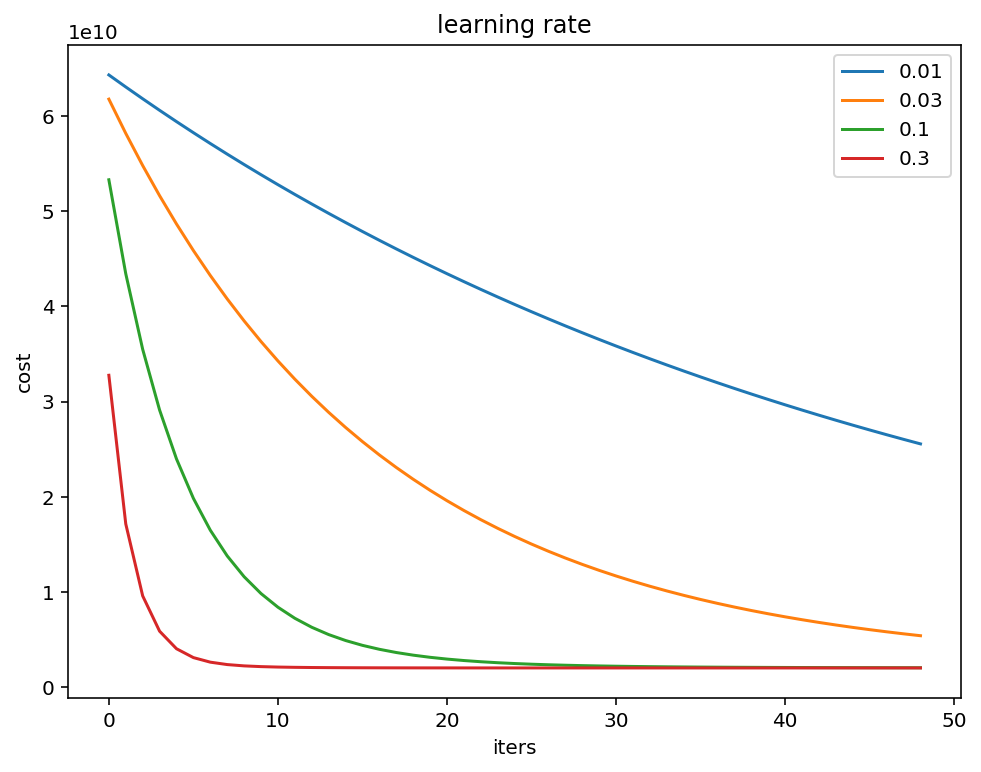

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('iters')
ax.set_ylabel('cost')
ax.set_title('learning rate')
alphas = [ 0.01,0.03,0.1,0.3]
for alpha in alphas: 
    _,j_costs = gradient_descent(x_test,y_test,np.array([[0],[0],[0]]),alpha=alpha,iters = 50)
    ax.plot( j_costs, label = alpha) 
ax.legend(alphas)

### 2.2.1 predict
use this value of θ to predict the price of a house with 1650 square feet and 3 bedrooms. 

In [13]:
#根据上述曲线，选择下降最快的0.3作为学习率进行计算
final_theta , _ = gradient_descent(x_test,y_test,np.array([[0],[0],[0]]),alpha=0.3,iters = 50)

In [14]:
#最终θ值
final_theta

array([[340412.65082846],
       [110564.34331674],
       [ -6582.76730872]])

In [15]:
#特征要先标准化再带入 θ
[1,(1650-avg[0])/sigma[0],(3-avg[1])/sigma[1]]@final_theta

array([293095.97089133])

## 2.3 Normal Equations

In [16]:
x = data2.iloc[:,:2]
x.insert(0,'ones',1)
x_test = x.values
y_test = data2.iloc[:,-1:].values
theta = np.linalg.inv(x_test.T @ x_test) @ x_test.T @ y_test

In [17]:
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [18]:
#正规方程预测，与梯度下降法接近
[1,1650,3]@theta

array([293081.46433489])